In [23]:
from foobah.gcode import GCODE
from foobah.utils import preview_png
from foobah.methods import line_threshold

import PIL
import PIL.Image
import PIL.ImageFilter

from IPython.display import display

from random import uniform

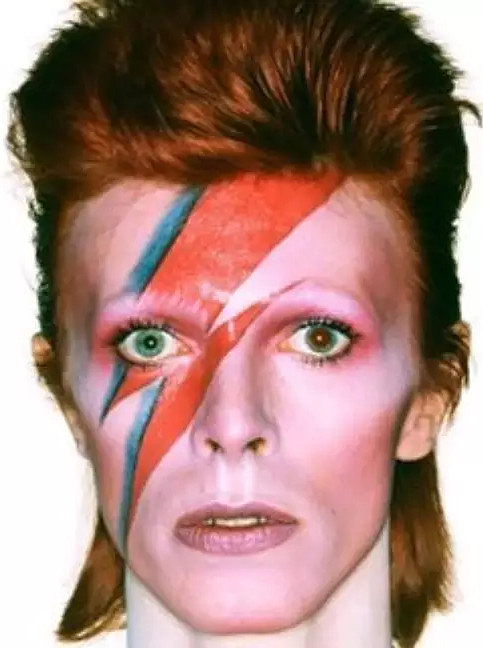

In [24]:
basename = "foobar"
scale = 1
image_name = "images/david-bowie.jpg"
image = PIL.Image.open(image_name)

image = image.resize((int(image.width / scale), int(image.height / scale)), PIL.Image.ANTIALIAS)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)
# image = image.filter(PIL.ImageFilter.CONTOUR)
image = image.filter(PIL.ImageFilter.DETAIL)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)

# image = image.rotate(-90, expand=True)
#
image = image.convert("RGB")

width = image.width
height = image.height

display(image)

In [25]:
gcode = GCODE(basename, feedrate=3500)
gcode.move_to_starting_position()
gcode.draw_boundaries()
gcode.pen_up()

In [26]:
line_threshold(image=image, gcode=gcode, threshold=0.91, angle=uniform(0, 180), step_size=1.5)
line_threshold(image=image, gcode=gcode, threshold=0.85, angle=uniform(0, 180), step_size=2)
line_threshold(image=image, gcode=gcode, threshold=0.70, angle=uniform(0, 180), step_size=3)
line_threshold(image=image, gcode=gcode, threshold=0.60, angle=uniform(0, 180), step_size=3)
line_threshold(image=image, gcode=gcode, threshold=0.50, angle=uniform(0, 180), step_size=4)
line_threshold(image=image, gcode=gcode, threshold=0.35, angle=uniform(0, 180), step_size=5)

# n_layers = 10
# min_threshold = 0.3
# max_threshold = 0.9
# min_step_size = 17
# max_step_size = 2

# for i in range(n_layers):
#     threshold = round(min_threshold + (i / (n_layers - 1)) * (max_threshold - min_threshold), 2)
#     step_size = round(min_step_size + (i / (n_layers - 1)) * (max_step_size - min_step_size))
#     print(i, threshold, step_size)
#     line_threshold(image=image, gcode=gcode, threshold=threshold, angle=uniform(0, 180), step_size=step_size)

In [27]:
gcode.pen_up()
gcode.move_to_starting_position()
gcode.flush()

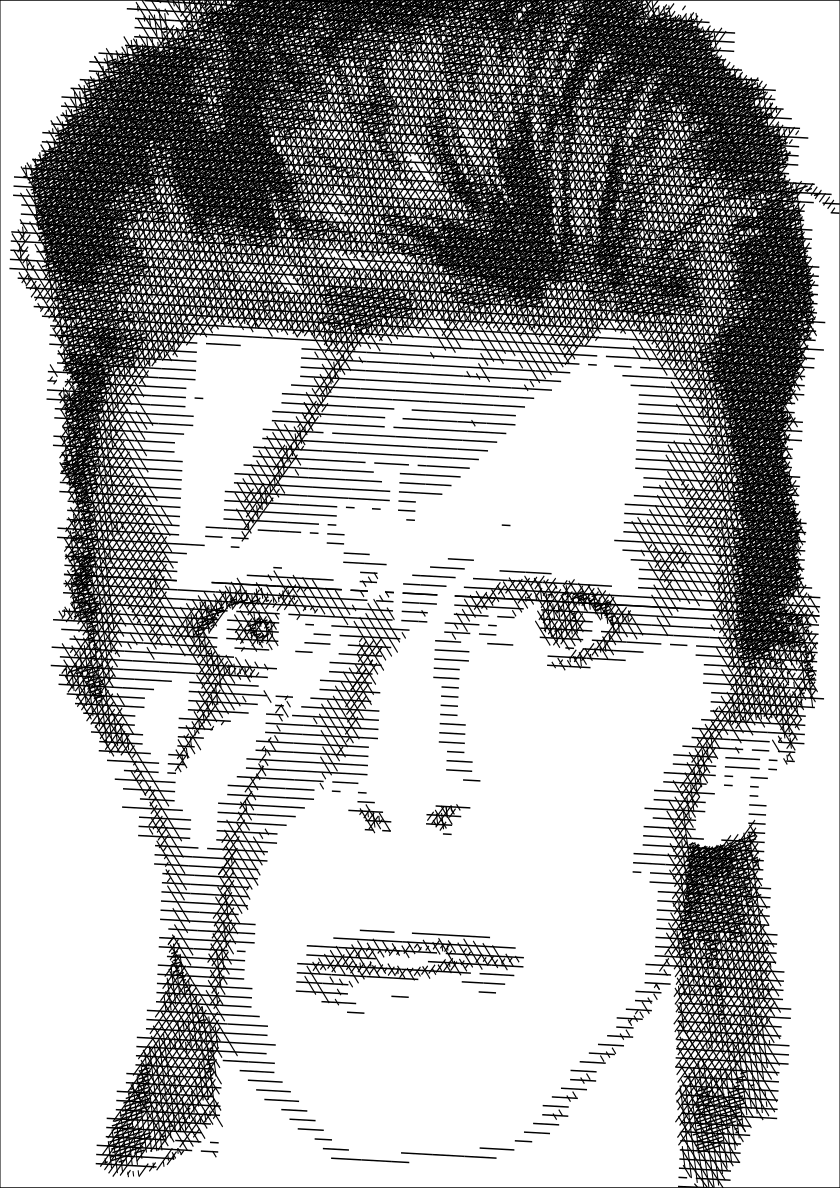

In [28]:
preview_png(basename, scale=4)